## ADULT INCOME ANALYSIS

### Objective

This project focuses on predicting income levels based on demographic and employment-related attributes using the UCI Adult Income dataset. The goal is to classify individuals into two income categories:

1. Less than or equal to 50K
2. Greater than 50K

Dataset link: https://archive.ics.uci.edu/dataset/2/adult

### Importing Libraries

In [160]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

### Loading Dataset

In [3]:
data = pd.read_csv("adult.csv")
print("\t")
print("Adult Income Dataset")
print("\t")
data

	
Adult Income Dataset
	


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Preliminary Analysis

In [5]:
print(f"The shape of the dataset is {data.shape}")

The shape of the dataset is (48842, 15)


In [7]:
print("\t")
print("Dataset Information:")
print("\t")
data.info()

	
Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
print("\t")
print("Summary Statistics:")
print("\t")
data.describe()

	
Summary Statistics:
	


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Null Values**

In [11]:
print("\t")
print("Unique Values in Categorical columns:")
print("\t")
data.nunique()

	
Unique Values in Categorical columns:
	


age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [13]:
#replaces everything with a '?' with Nan
data = data.replace(to_replace = '?', value = np.nan)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
print("\t")
print("Total number of missing values:")
print("\t")
data.isnull().sum()

	
Total number of missing values:
	


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [17]:
# Dropping null rows
data.dropna(inplace=True)

**Removing Duplicates**

In [19]:
print("\t")
print(f"The shape of the dataset before removing the duplicates is {data.shape}")

	
The shape of the dataset before removing the duplicates is (45222, 15)


In [21]:
# Check for duplicate rows
print("\t")
print(f"Total number of duplicate values is {data.duplicated().sum()}")

	
Total number of duplicate values is 47


In [23]:
# Remove duplicates if necessary
data = data.drop_duplicates()

In [25]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {data.shape}")

	
The shape of the dataset after removing the duplicates is (45175, 15)


### EDA

**Histogram → To check the distribution of numerical columns.**

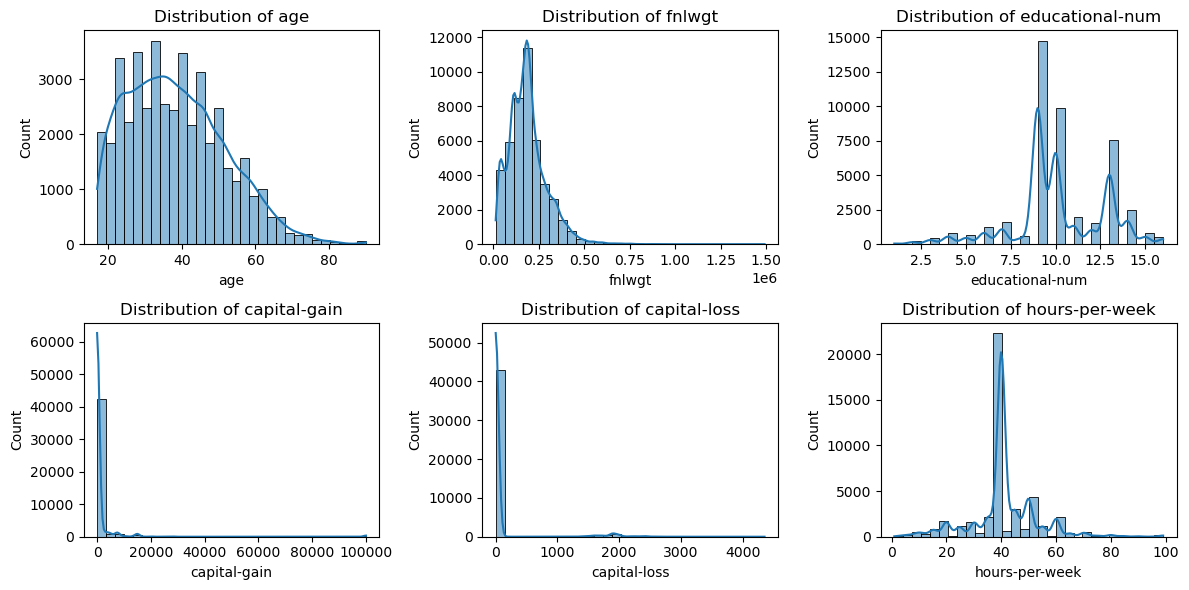

In [38]:
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Bar Plot → To check the count of each category.**

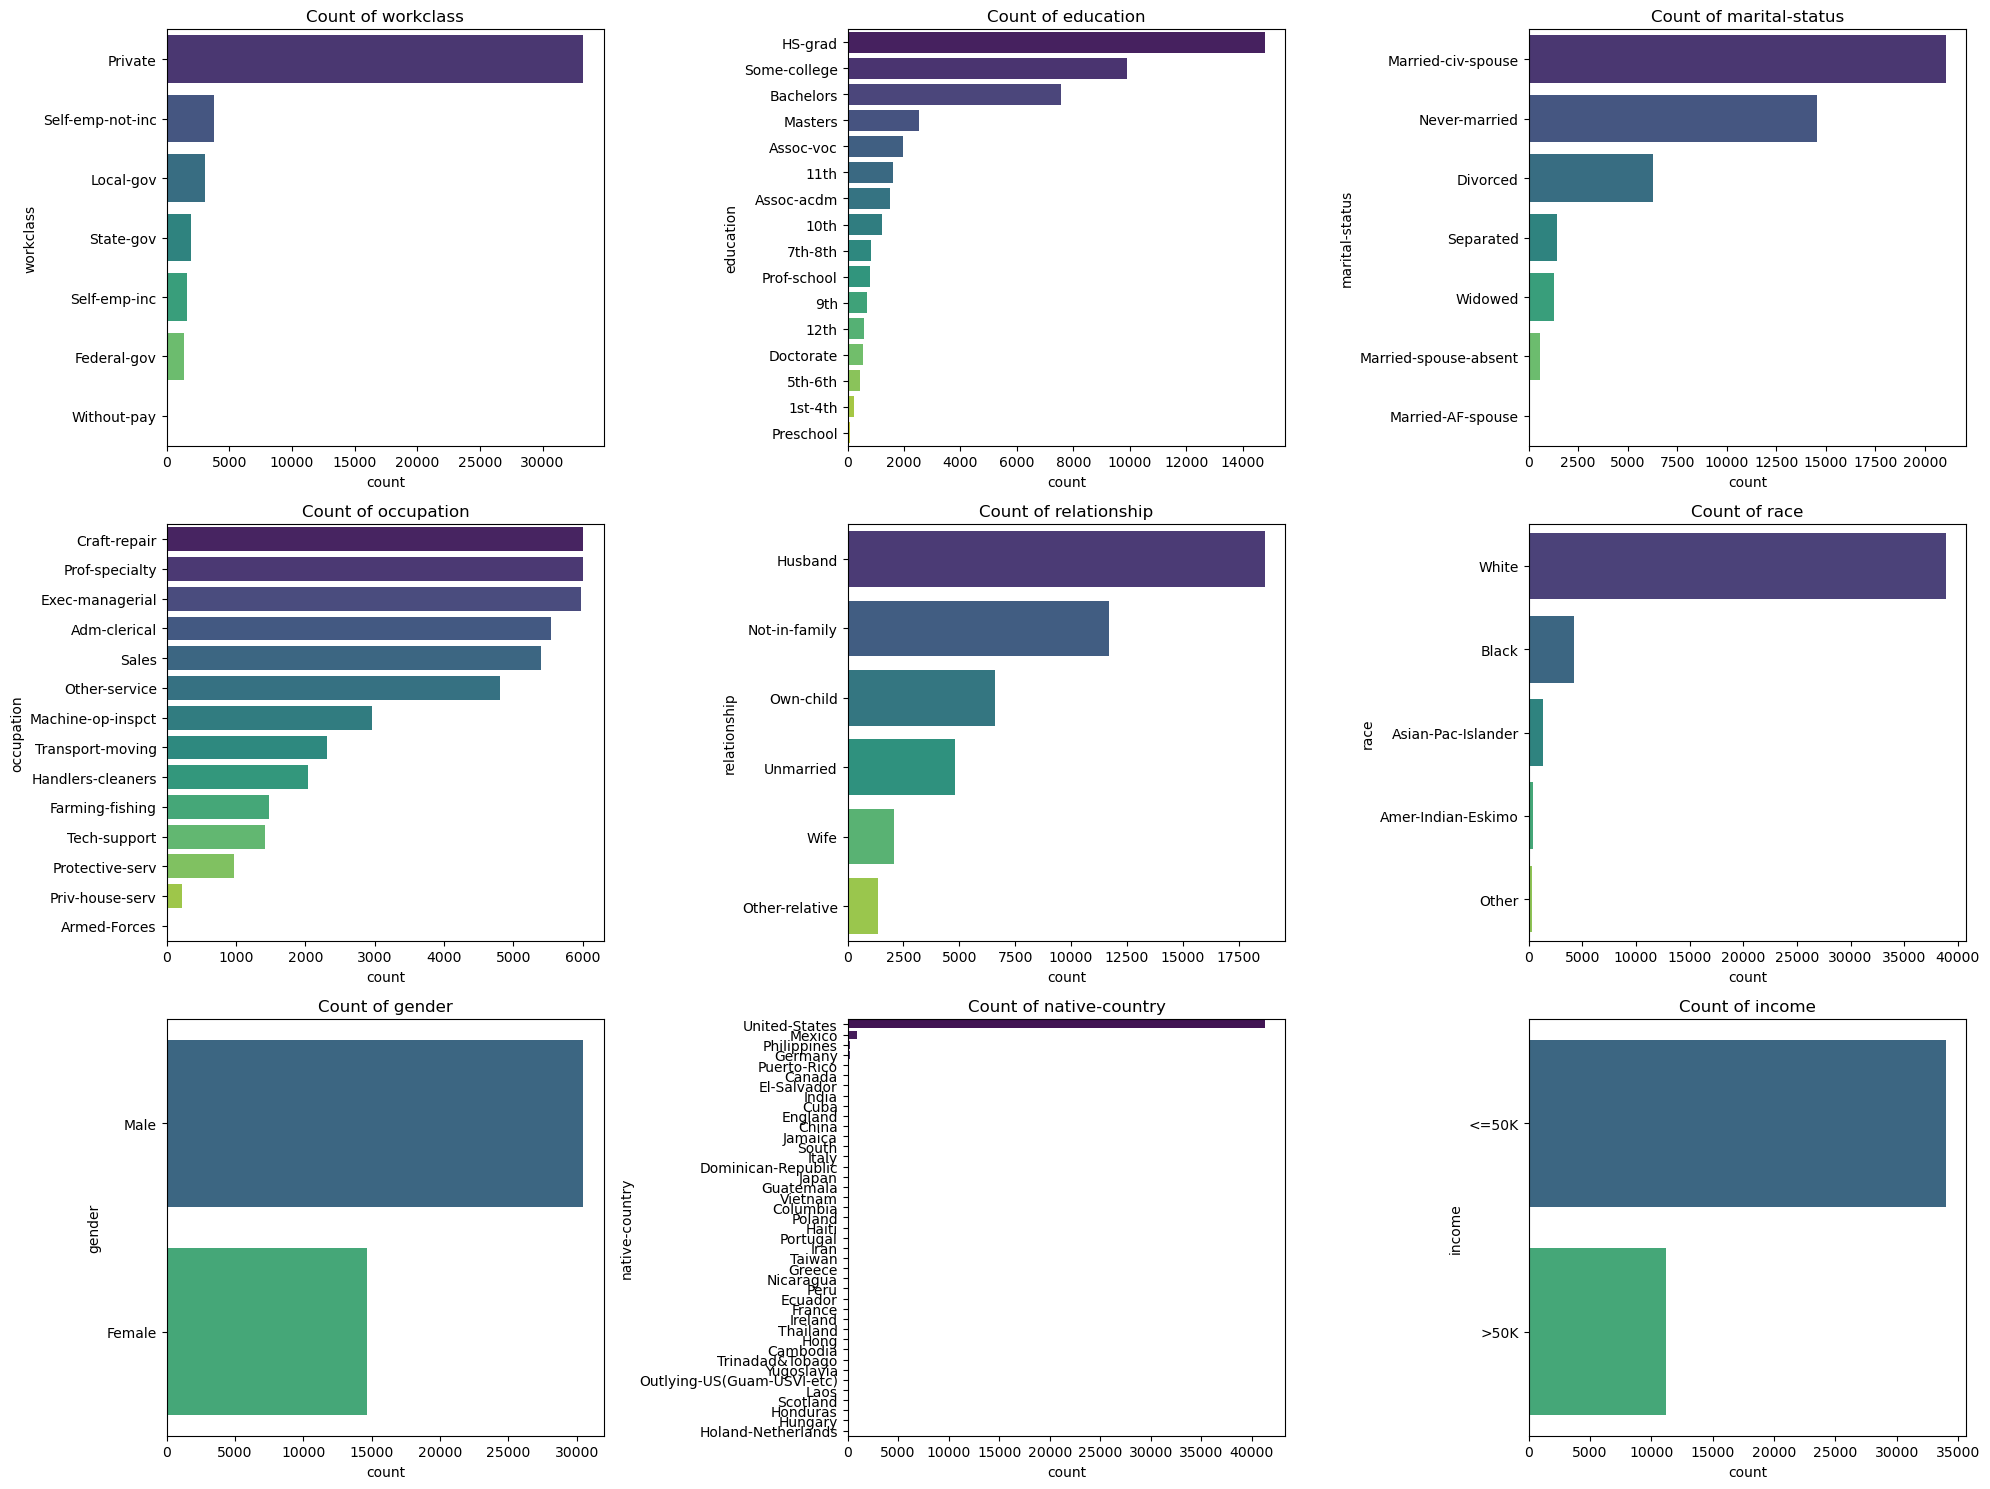

In [42]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

**Countplot with Hue → To check how income varies across different categories.**

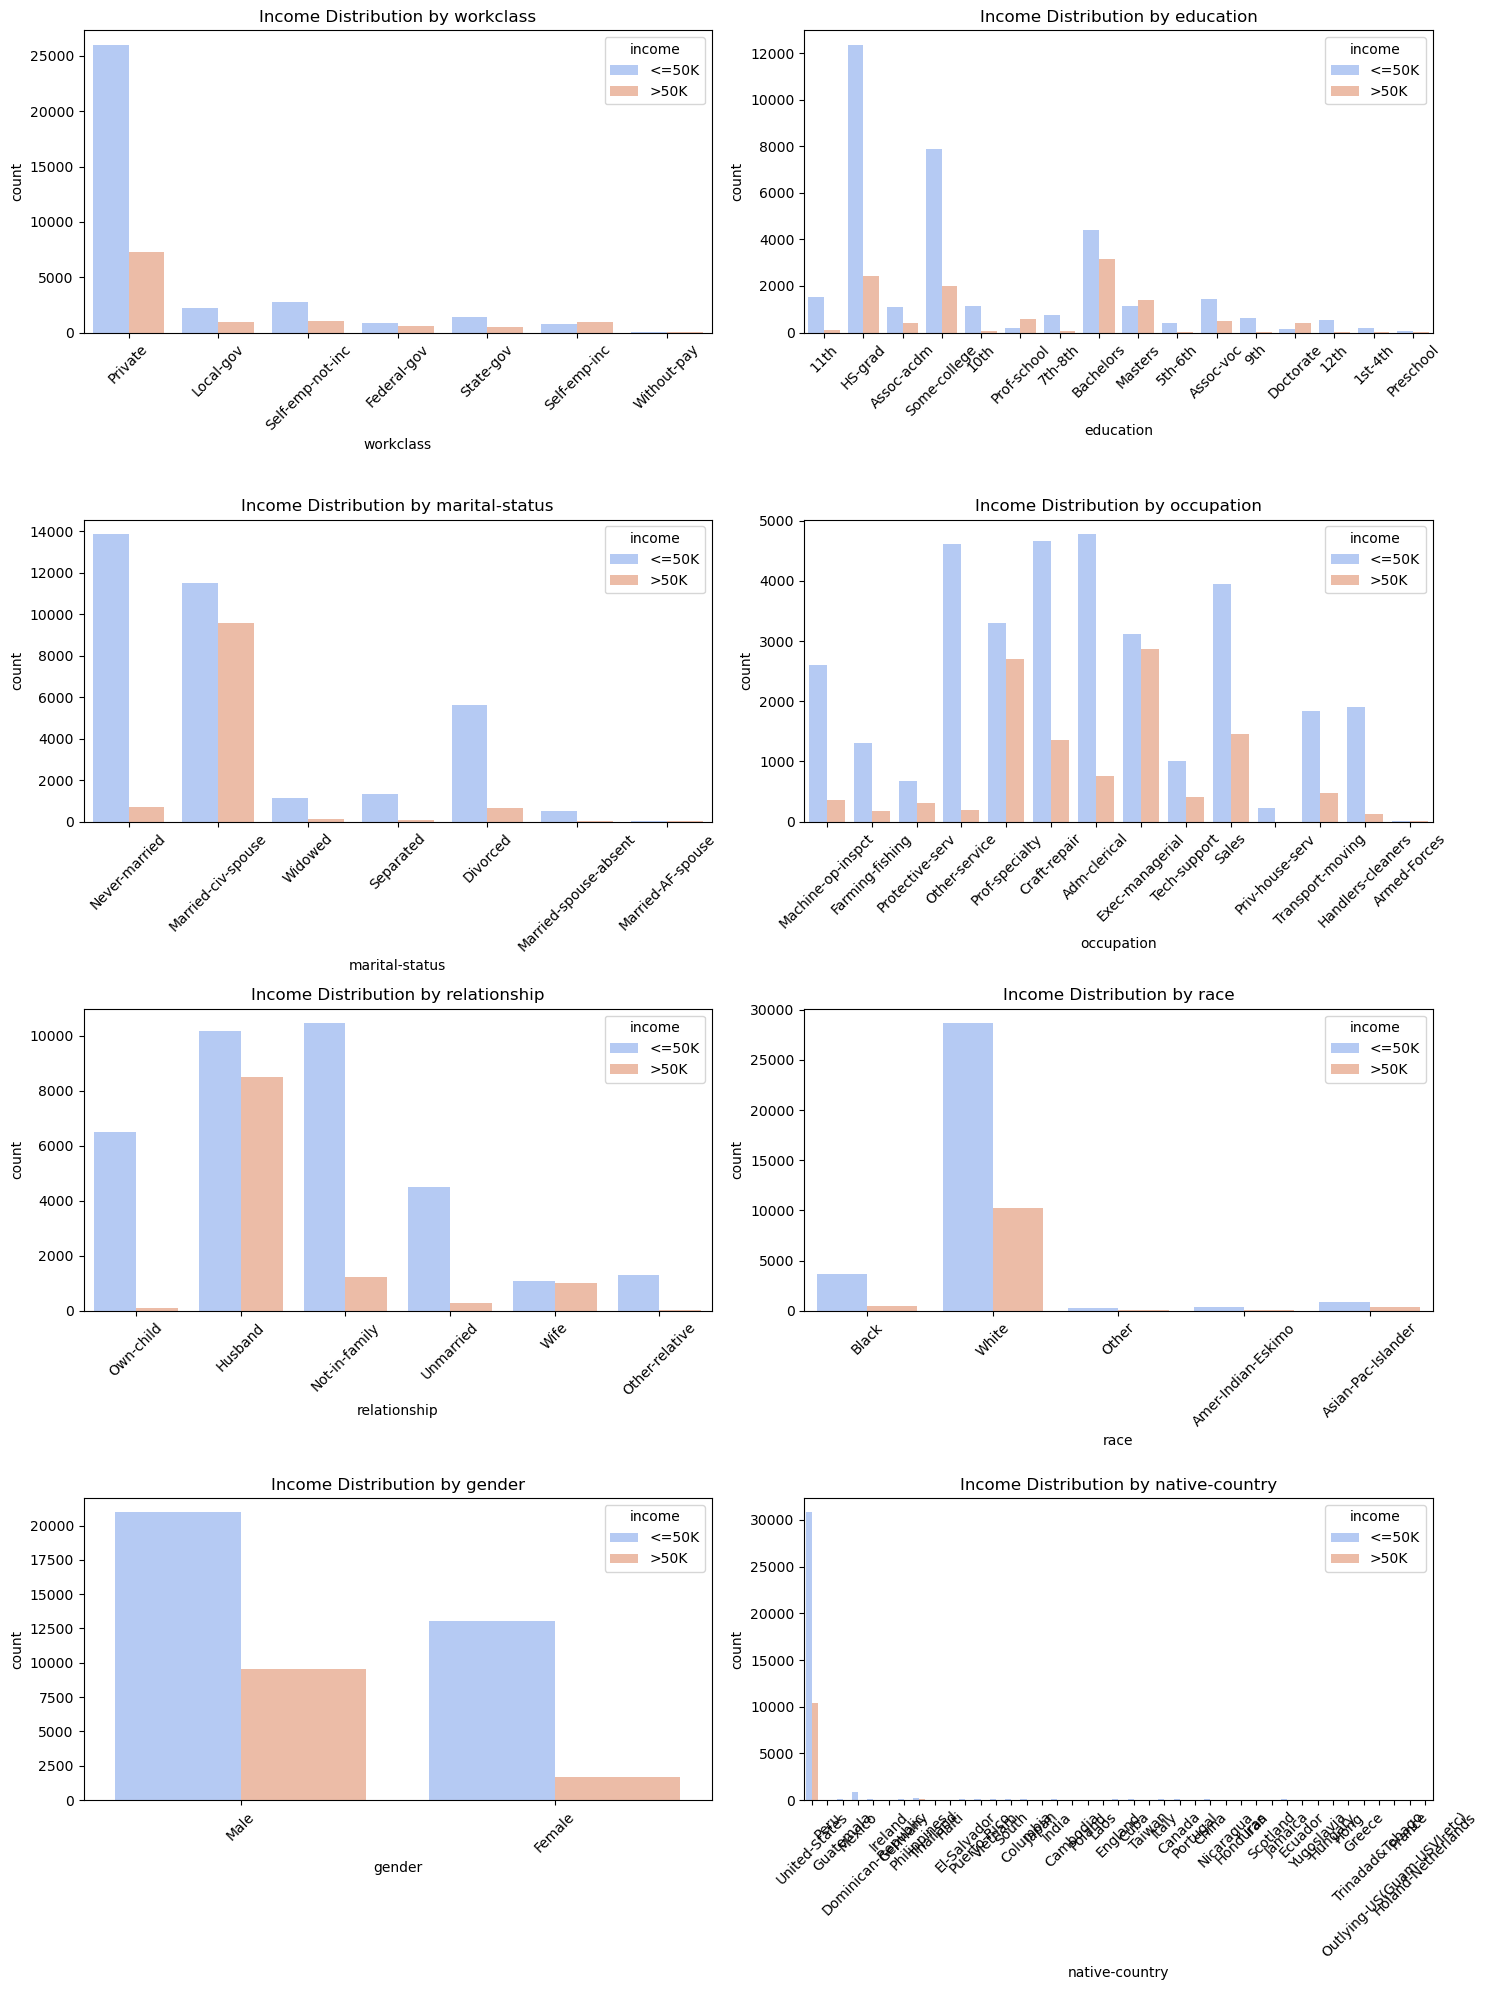

In [117]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                    'relationship', 'race', 'gender', 'native-country']

plt.figure(figsize=(15, 20))  # Adjust figure size for better visualization

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)  # Create subplots (4 rows, 2 columns)
    sns.countplot(x=data[col], hue=data['income'], palette='coolwarm')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'Income Distribution by {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Stacked Bar Chart → To see how income varies by workclass.**

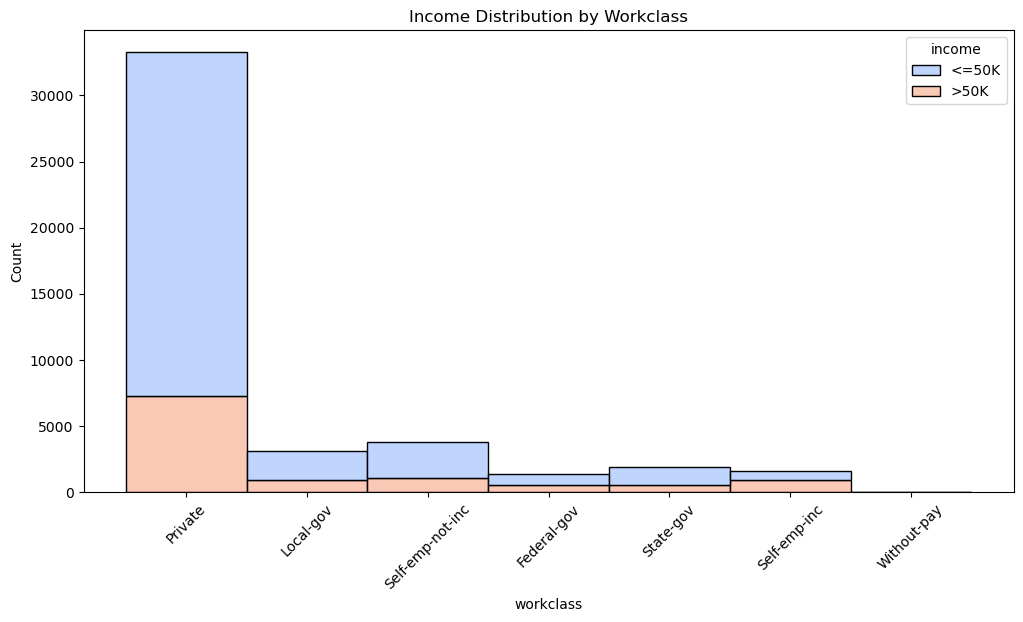

In [115]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='workclass', hue='income', multiple='stack', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Income Distribution by Workclass')
plt.show()

**Stacked Bar Chart → To see how income varies by Gender.**

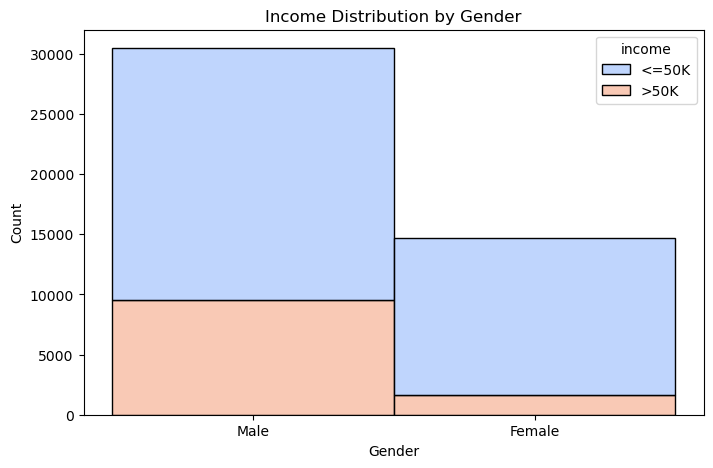

In [99]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="gender", hue="income", multiple="stack", palette="coolwarm")
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Stacked Bar Chart → To see how income varies by occupation**

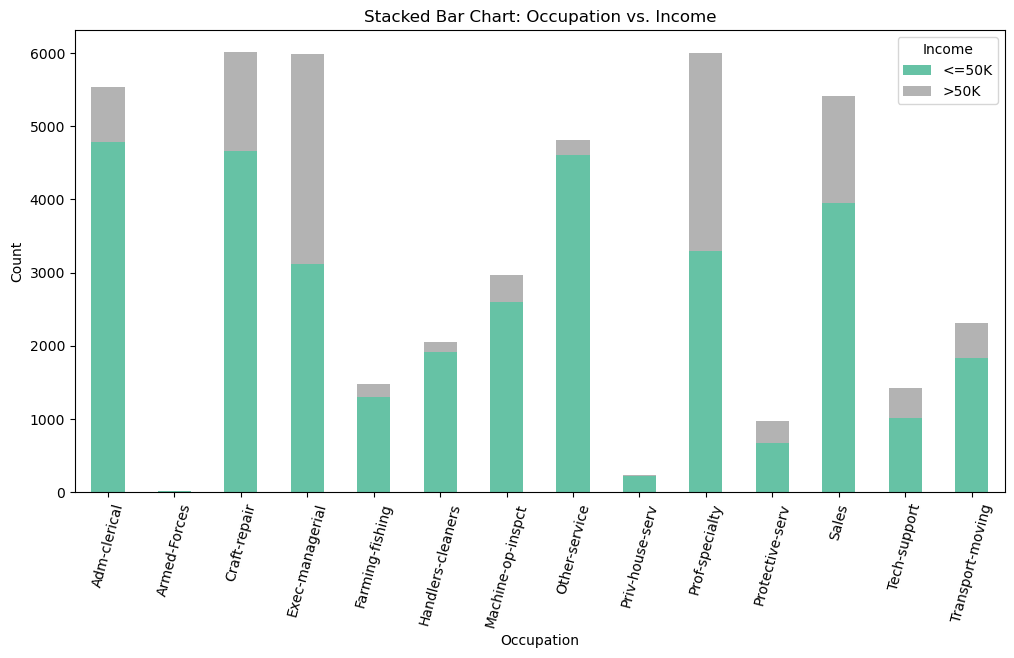

In [129]:
occupation_income = data.groupby(['occupation', 'income']).size().unstack()

occupation_income.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Bar Chart: Occupation vs. Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.legend(title='Income')
plt.show()

**KDE Plot: Age v Income**

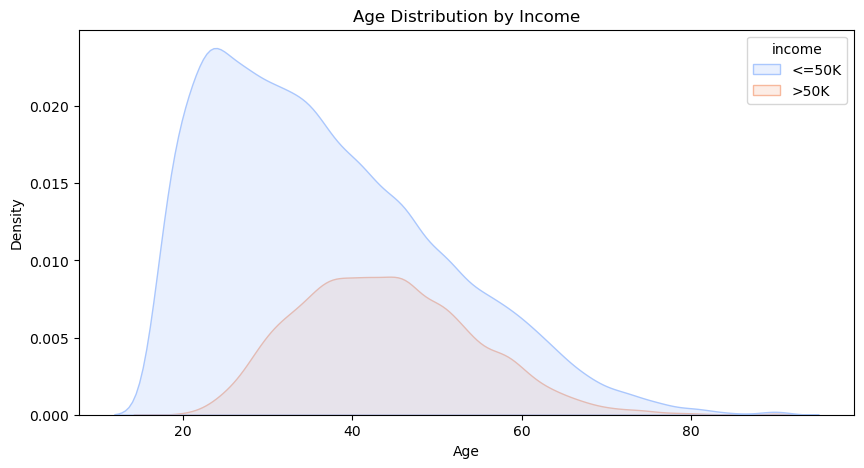

In [113]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='age', hue='income', fill=True, palette='coolwarm')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

**KDE Plot: Hours Worked v Income**

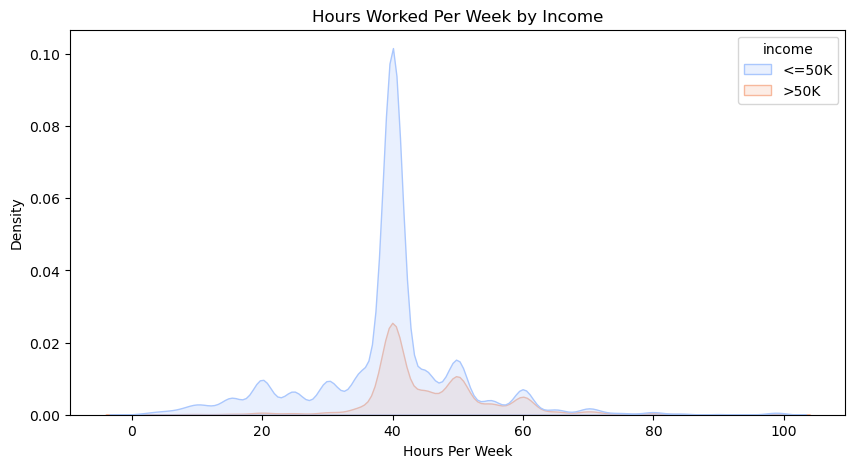

In [80]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='hours-per-week', hue='income', fill=True, palette='coolwarm')
plt.title('Hours Worked Per Week by Income')
plt.xlabel('Hours Per Week')
plt.ylabel('Density')
plt.show()

### Outlier Detection & Handling

In [140]:
# Select numerical columns
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

# Calculate skewness & kurtosis
stats_df = pd.DataFrame({
    'Feature': num_cols,
    'Skewness': [data[col].skew() for col in num_cols],
    'Kurtosis': [data[col].kurt() for col in num_cols]
})

# Format the table with borders
html_table = stats_df.style.set_table_attributes("style='border: 1px solid black;'")\
                           .set_properties(**{'border': '1px solid black', 
                                              'padding': '8px'})\
                           .set_caption("Table: Skewness & Kurtosis of Numerical Features")

# Display the table
display(html_table)

,Feature,Skewness,Kurtosis
0,age,0.531796,-0.158989
1,hours-per-week,0.341760,3.201876
2,capital-gain,11.782816,149.991798
3,capital-loss,4.513622,19.338843


In [142]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print dataset shape before removing outliers
print(f"Dataset shape before IQR outlier removal: {data.shape}")

# Apply IQR method to all numerical columns
for col in ['age', 'hours-per-week', 'capital-gain', 'capital-loss']:
    data_removed_iqr = remove_outliers_iqr(data, col)

# Print dataset shape after removing outliers
print(f"Dataset shape after IQR outlier removal: {data_removed_iqr.shape}")

Dataset shape before IQR outlier removal: (45175, 15)
Dataset shape after IQR outlier removal: (43035, 15)


In [144]:
from scipy import stats

# Print dataset shape before removing outliers
print(f"Dataset shape before Z-score outlier removal: {data.shape}")

# Apply Z-score method (removing points with Z-score > 3)
data_removed_z = data[(np.abs(stats.zscore(data[['age', 'hours-per-week', 'capital-gain', 'capital-loss']])) < 3).all(axis=1)]

# Print dataset shape after removing outliers
print(f"Dataset shape after Z-score outlier removal: {data_removed_z.shape}")

Dataset shape before Z-score outlier removal: (45175, 15)
Dataset shape after Z-score outlier removal: (42062, 15)


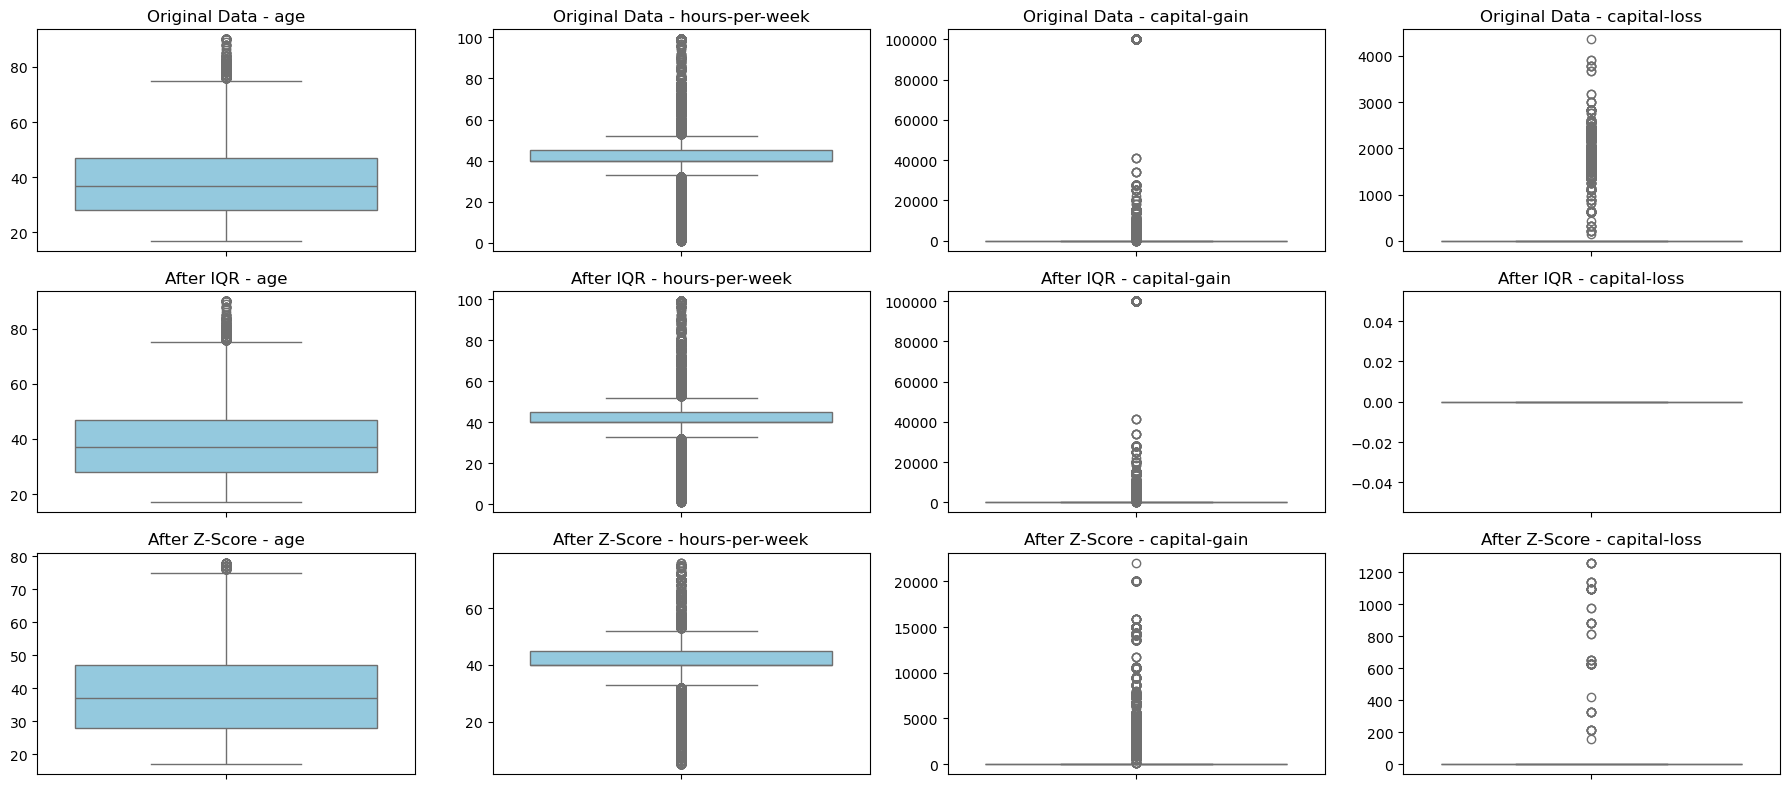

In [148]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(18, 8))

# List of numerical columns to compare
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
datasets = [("Original Data", data), ("After IQR", data_removed_iqr), ("After Z-Score", data_removed_z)]

# Generate boxplots
for i, (title, df) in enumerate(datasets):
    for j, col in enumerate(num_cols):
        ax = axes[i, j]
        sns.boxplot(y=df[col], ax=ax, color='skyblue')
        ax.set_title(f"{title} - {col}")
        ax.set_ylabel("")  # Remove y-label to avoid repetition

plt.tight_layout()
plt.show()

**Observations**

1. **Age:** Both IQR and Z-Score removed extreme outliers, but Z-Score removed more.
2. **Hours per week:** Z-Score, seems to have removed more extreme cases. However, outliers still exists.
3. **Capital Gain & Capital Loss:** Z-Score performed better, reducing extreme high values.

For a balanced outlier removal, I am going to implement a **hybrid approach**. I will use IQR for Age and Hours per week and Z-Score for Capital Gain and Capital Loss.

In [152]:
# IQR method for 'age' and 'hours-per-week'
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Z-Score method for 'capital-gain' and 'capital-loss'
def remove_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    return data[np.abs((data[column] - mean) / std) <= threshold]

# Copy dataset before removal
hybrid_data = data.copy()

# Apply IQR for 'age' and 'hours-per-week'
hybrid_data = remove_outliers_iqr(hybrid_data, 'age')
hybrid_data = remove_outliers_iqr(hybrid_data, 'hours-per-week')

# Apply Z-Score for 'capital-gain' and 'capital-loss'
hybrid_data = remove_outliers_zscore(hybrid_data, 'capital-gain')
hybrid_data = remove_outliers_zscore(hybrid_data, 'capital-loss')

# Print shape before and after hybrid removal
print("Dataset shape before hybrid outlier removal:", data.shape)
print("Dataset shape after hybrid outlier removal:", hybrid_data.shape)

Dataset shape before hybrid outlier removal: (45175, 15)
Dataset shape after hybrid outlier removal: (31458, 15)


### Feature Encoding

In [155]:
# Identify categorical columns
categorical_cols = hybrid_data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [162]:
# Copy dataset
encoded_data = hybrid_data.copy()

# Label Encoding for binary categorical variables
binary_cols = ['gender', 'income']
label_encoder = LabelEncoder()
for col in binary_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

# One-Hot Encoding for multi-category categorical variables
multi_category_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'native-country']

encoded_data = pd.get_dummies(encoded_data, columns=multi_category_cols, drop_first=True)

# Display dataset shape after encoding
print("Dataset shape after encoding:", encoded_data.shape)

# Show first few rows
encoded_data.head()

Dataset shape after encoding: (31458, 96)


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,True,...,False,False,False,False,False,False,False,True,False,False
8,24,369667,10,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False


### Feature Scaling

In [164]:
# Identify numerical columns
numerical_cols = encoded_data.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
encoded_data_scaled = encoded_data.copy()  # Create a copy of the dataset
encoded_data_scaled[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

# Display the first few rows
print(encoded_data_scaled.head())

# Check dataset shape after scaling
print("Dataset shape after scaling:", encoded_data_scaled.shape)

        age    fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0 -1.139884  0.332911        -1.236958       1     -0.253596     -0.038942   
1 -0.049775 -0.960370        -0.435132       1     -0.253596     -0.038942   
2 -0.888320  1.372809         0.767608       1     -0.253596     -0.038942   
3  0.453352 -0.294706        -0.034219       1      3.056400     -0.038942   
8 -1.223739  1.681675        -0.034219       0     -0.253596     -0.038942   

   hours-per-week  income  workclass_Local-gov  workclass_Private  ...  \
0       -0.390352       0                False               True  ...   
1        2.100708       0                False               True  ...   
2       -0.390352       1                 True              False  ...   
3       -0.390352       1                False               True  ...   
8       -0.390352       0                False               True  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                    False  

### Feature Selection

In [171]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Separate features and target variable
X = encoded_data_scaled.drop(columns=['income'])  # Features
y = encoded_data_scaled['income']  # Target

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Convert to DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort by importance
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display Mutual Information scores
from IPython.display import display
display(mi_df.style.set_caption("Mutual Information Scores").set_table_attributes("style='border:1px solid black;'"))

# Set a threshold (e.g., 0.01) to remove low importance features
threshold = 0.01
low_mi_features = mi_df[mi_df['MI Score'] < threshold]['Feature'].tolist()

print(f"Features to remove (MI Score < {threshold}): {low_mi_features}")

# Drop low MI features
encoded_data_mi = encoded_data_scaled.drop(columns=low_mi_features)

# Display new dataset shape
print("Dataset shape after Mutual Information feature selection:", encoded_data_mi.shape)

,Feature,MI Score
29,marital-status_Married-civ-spouse,0.106550
4,capital-gain,0.084520
0,age,0.055525
31,marital-status_Never-married,0.054595
2,educational-num,0.053118
1,fnlwgt,0.029030
47,relationship_Not-in-family,0.025708
3,gender,0.025248
49,relationship_Own-child,0.024004
6,hours-per-week,0.018074


Features to remove (MI Score < 0.01): ['race_White', 'native-country_United-States', 'workclass_Private', 'native-country_Haiti', 'marital-status_Separated', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'native-country_Philippines', 'workclass_Self-emp-inc', 'marital-status_Married-spouse-absent', 'education_Doctorate', 'native-country_Italy', 'relationship_Other-relative', 'occupation_Farming-fishing', 'education_11th', 'native-country_Iran', 'native-country_Scotland', 'education_9th', 'native-country_England', 'native-country_Germany', 'race_Black', 'native-country_Nicaragua', 'native-country_Canada', 'native-country_Thailand', 'native-country_Japan', 'occupation_Priv-house-serv', 'native-country_South', 'education_12th', 'native-country_Hong', 'capital-loss', 'native-country_Dominican-Republic', 'education_5th-6th', 'native-country_China', 'native-country_Poland', 'occupation_Armed-Forces', 'race_Asian-Pac-Islander', 'native-country_Taiwan', 'native-country_Vietna

### Splitting Dataset

In [180]:
final_data = encoded_data_mi.copy()
final_data

,age,fnlwgt,educational-num,gender,capital-gain,hours-per-week,income,education_Bachelors,education_HS-grad,education_Masters,education_Prof-school,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,-1.139884,0.332911,-1.236958,1,-0.253596,-0.390352,0,False,False,False,False,False,True,False,False,False,False,True,False,False
1,-0.049775,-0.960370,-0.435132,1,-0.253596,2.100708,0,False,True,False,False,True,False,False,False,False,False,False,False,False
2,-0.888320,1.372809,0.767608,1,-0.253596,-0.390352,1,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0.453352,-0.294706,-0.034219,1,3.056400,-0.390352,1,False,False,False,False,True,False,False,False,False,False,False,False,False
8,-1.223739,1.681675,-0.034219,0,-0.253596,-0.390352,0,False,False,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-1.391448,1.119804,-0.034219,1,-0.253596,-0.390352,0,False,False,False,False,False,True,False,False,False,True,False,False,False
48837,-0.972175,0.620856,0.767608,0,-0.253596,-0.888564,0,False,False,False,False,True,False,False,False,False,False,False,False,True
48838,0.117934,-0.350870,-0.435132,1,-0.253596,-0.390352,1,False,True,False,False,True,False,False,False,False,False,False,False,False
48839,1.627316,-0.374132,-0.435132,0,-0.253596,-0.390352,0,False,True,False,False,False,False,False,False,False,False,False,True,False


In [182]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = final_data.drop(columns=['income'])  # Exclude target column
y = final_data['income']  # Target variable

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (25166, 19) (25166,)
Testing set shape: (6292, 19) (6292,)


Class Distribution in Percentage:
income
0    75.751796
1    24.248204
Name: proportion, dtype: float64


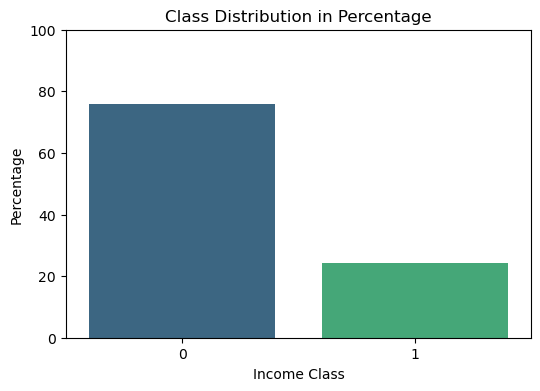

In [188]:
# Calculate class distribution
class_distribution = y.value_counts(normalize=True) * 100  # Convert to percentage

# Display results
print("Class Distribution in Percentage:")
print(class_distribution)

# Optional: Display as a bar plot for better visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.xlabel("Income Class")
plt.ylabel("Percentage")
plt.title("Class Distribution in Percentage")
plt.ylim(0, 100)
plt.show()

Since the dataset is imbalanced, we will implement SMOTE analysis.

In [191]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define features and target variable
X = final_data.drop(columns=['income'])  # Features
y = final_data['income']  # Target variable

# Initialize SMOTE with random_state for reproducibility
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("Class Distribution After SMOTE:", Counter(y_resampled))

# Convert back to DataFrame
final_data_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['income'])], axis=1)

Class Distribution After SMOTE: Counter({0: 23830, 1: 23830})


In [193]:
from sklearn.model_selection import train_test_split

# Define features and target
X = final_data_smote.drop(columns=['income'])  # Features
y = final_data_smote['income']  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of train and test sets
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (38128, 19) (38128,)
Testing Set Shape: (9532, 19) (9532,)


### Model Training

**Logistic Regression**

🔹 Logistic Regression Accuracy: 80.79%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      4766
           1       0.79      0.84      0.81      4766

    accuracy                           0.81      9532
   macro avg       0.81      0.81      0.81      9532
weighted avg       0.81      0.81      0.81      9532



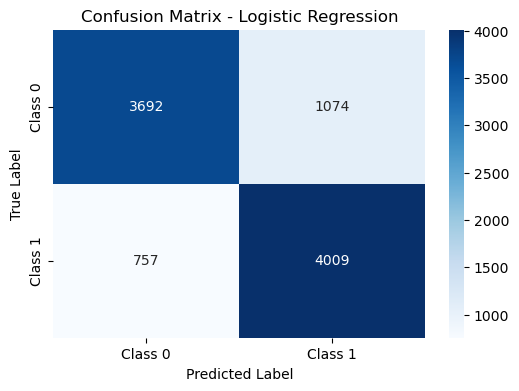

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log) * 100

# Print accuracy and classification report first
print(f"🔹 Logistic Regression Accuracy: {accuracy_log:.2f}%\n")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_log))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Random Forest Classifier**

🔹 Random Forest Accuracy: 86.96%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      4766
           1       0.86      0.89      0.87      4766

    accuracy                           0.87      9532
   macro avg       0.87      0.87      0.87      9532
weighted avg       0.87      0.87      0.87      9532



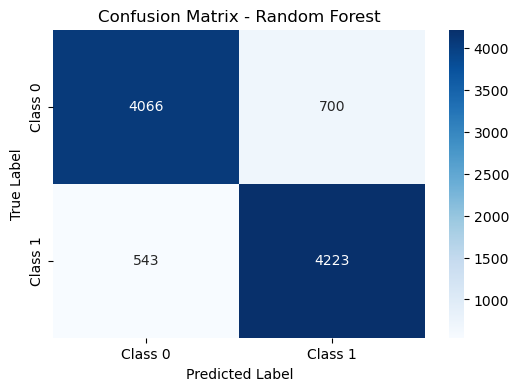

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.2f}%\n")

# Display classification report
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**XGBoost Classifier**

🔹 XGBoost Accuracy: 86.93%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4766
           1       0.86      0.88      0.87      4766

    accuracy                           0.87      9532
   macro avg       0.87      0.87      0.87      9532
weighted avg       0.87      0.87      0.87      9532



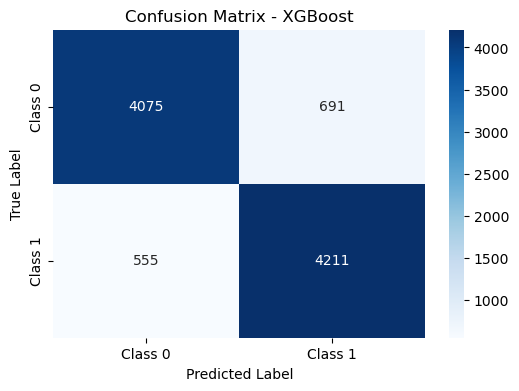

In [205]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100

# Print accuracy and classification report first
print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.2f}%\n")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

**K-Nearest Neighbors (KNN)**

🔹 k-NN Accuracy: 83.86%

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      4766
           1       0.80      0.90      0.85      4766

    accuracy                           0.84      9532
   macro avg       0.84      0.84      0.84      9532
weighted avg       0.84      0.84      0.84      9532



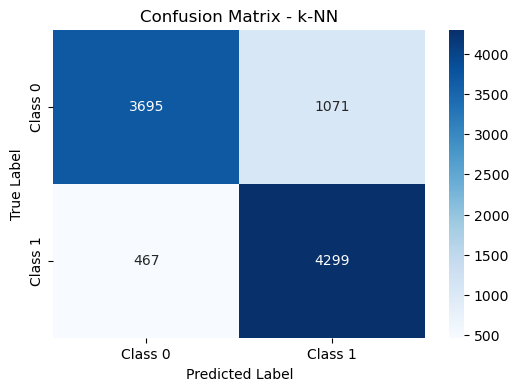

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize k-NN Classifier (choosing k=5 as a starting point, can be tuned)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100

# Print accuracy and classification report first
print(f"🔹 k-NN Accuracy: {accuracy_knn:.2f}%\n")
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - k-NN")
plt.show()

### Model Comparison

In [213]:
import pandas as pd
from tabulate import tabulate

# Store model names and their corresponding accuracies
model_results = {
    "Logistic Regression": accuracy_log,
    "Random Forest": accuracy_rf,
    "XGBoost": accuracy_xgb,
    "k-NN": accuracy_knn
}

# Convert dictionary to DataFrame and sort by accuracy (descending)
results_df = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy (%)"])
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False)

# Display table with formatting
print(tabulate(results_df, headers="keys", tablefmt="grid", showindex=False))

+---------------------+----------------+
| Model               |   Accuracy (%) |
+=====================+================+
| Random Forest       |        86.9597 |
+---------------------+----------------+
| XGBoost             |        86.9282 |
+---------------------+----------------+
| k-NN                |        83.8649 |
+---------------------+----------------+
| Logistic Regression |        80.791  |
+---------------------+----------------+


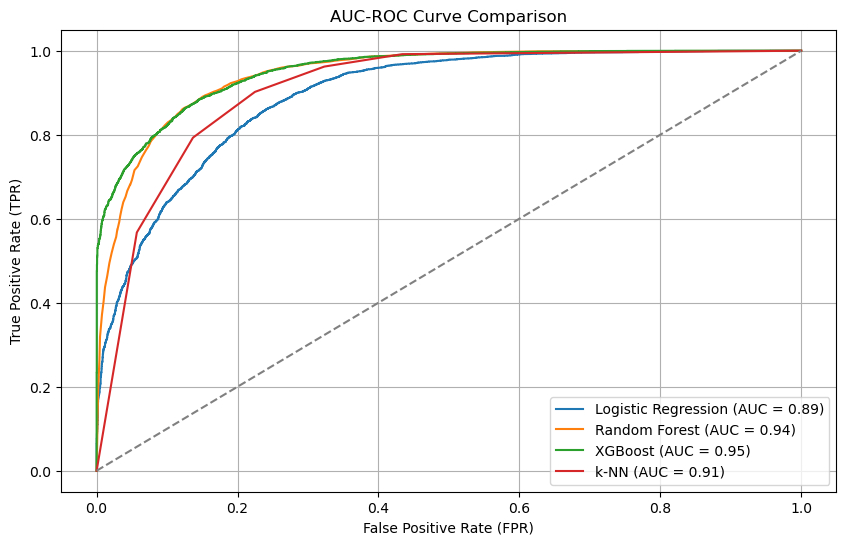

In [225]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_pred_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# XGBoost
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# k-NN
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Define models and their predictions
models = {
    "Logistic Regression": y_pred_prob_lr,
    "Random Forest": y_pred_prob_rf,
    "XGBoost": y_pred_prob_xgb,
    "k-NN": y_pred_prob_knn
}

# Plot ROC Curve
plt.figure(figsize=(10, 6))

for model, y_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("AUC-ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Model Performance Analysis & Insights

1. Accuracy Comparison

**Random Forest (86.96%)** achieved the highest accuracy, followed very closely by XGBoost (86.93%).
    
k-NN (83.86%) performed moderately well but lagged behind RF and XGB. Logistic Regression (80.79%) had the lowest accuracy, suggesting that linear decision boundaries might not be optimal for this dataset.

2. Precision, Recall & F1-score Analysis

**Random Forest** & **XGBoost** performed almost identically, with balanced precision and recall across both classes. k-NN had a higher recall for Class 1 (90%), meaning it better identifies positive cases but may misclassify some negatives. 
                                                                                                                                              
Logistic Regression had the lowest recall for Class 0 (77%), indicating it struggles to correctly classify negative cases.

3. AUC-ROC Comparison (Model Discrimination Ability)

**XGBoost (AUC = 0.95)** has the best ability to distinguish between classes, making it the most powerful classifier. Random Forest (AUC = 0.94) is very close to XGBoost, showing strong discrimination.

k-NN (AUC = 0.91) also performs well but is slightly behind the tree-based models. Logistic Regression (AUC = 0.89), being a linear model, struggles the most.


***Key Takeaways & Recommendations***

🔹 **Best Model:** **XGBoost (AUC = 0.95, Accuracy = 86.93%)** is the top-performing model.

🔹 Random Forest is a strong alternative (AUC = 0.94, Accuracy = 86.96%), especially if interpretability is a priority.

🔹 k-NN performed decently but may be computationally expensive as the dataset grows.

🔹 Logistic Regression isn't the best fit due to its limited ability to capture complex patterns.

### Model Deployment

In [231]:
# Save the model
joblib.dump(xgb_model, "xgboost_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [235]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load("xgboost_model.pkl")

In [237]:
y_pred = model.predict(X_test)

# Convert predictions to DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display first few rows
print(results_df.head())

       Actual  Predicted
18369       0          0
42187       1          1
43377       1          1
27145       0          0
14669       1          1


In [241]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to DataFrame
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Style the DataFrame with borders and center-aligned text
styled_table = results_df.head(20).style.set_table_styles(
    [{'selector': 'th',
      'props': [('background-color', '#4CAF50'),
                ('color', 'white'),
                ('font-size', '14px'),
                ('border', '1px solid black'),
                ('text-align', 'center')]},
     {'selector': 'td',
      'props': [('border', '1px solid black'),
                ('text-align', 'center'),
                ('padding', '5px')]}]
).set_properties(**{'text-align': 'center'})

# Display the styled table in Jupyter Notebook
display(HTML(styled_table.to_html()))

,Actual,Predicted
18369,0,0
42187,1,1
43377,1,1
27145,0,0
14669,1,1
43773,1,1
44276,1,1
13662,0,1
32113,1,1
34160,1,1
